In [7]:
import dlib
import cv2
import numpy as np
from PIL import Image
import sys
import os
import pyocr
import pyocr.builders

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = 16,12

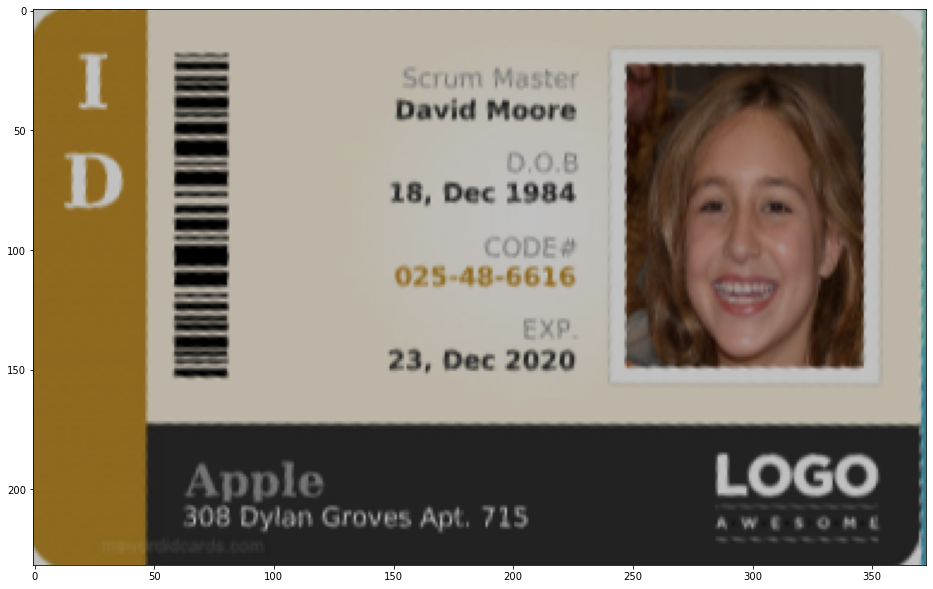

In [8]:
image = cv2.imread(os.path.join('.', "dataset", "validation", 'image_3.png'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image[int(image.shape[0] * 0.01):int(image.shape[0] * 0.99), 
              int(image.shape[1] * 0.01):int(image.shape[1] * 0.99)]
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
thresh = 255 - cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 7)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
lines = cv2.HoughLinesP(closing, rho=1, theta=3.14 / 180, threshold=80, minLineLength=100, maxLineGap=10)
hough_space = np.zeros(closing.shape).astype(np.uint8)
for line in lines:
    hough_space = cv2.line(hough_space, (line[0][0], line[0][1]), (line[0][2], line[0][3]), color=255, thickness=1)
points = []
for line in lines:
    points.append([line[0][0], line[0][1]])
    points.append([line[0][2], line[0][3]])
hull = cv2.convexHull(np.array(points), False)
center, size, angle = cv2.minAreaRect(hull)
center, size = tuple(map(int, center)), tuple(map(int, size))
height, width = image.shape[0], image.shape[1]
rot_matrix = cv2.getRotationMatrix2D(center, angle, 1)
img_rot = cv2.warpAffine(image, rot_matrix, (width, height))
img_crop = cv2.getRectSubPix(img_rot, size, center)
id_card_rgb = cv2.rotate(img_crop, cv2.ROTATE_90_COUNTERCLOCKWISE) if angle <= -45 else img_crop
plt.imshow(id_card_rgb)

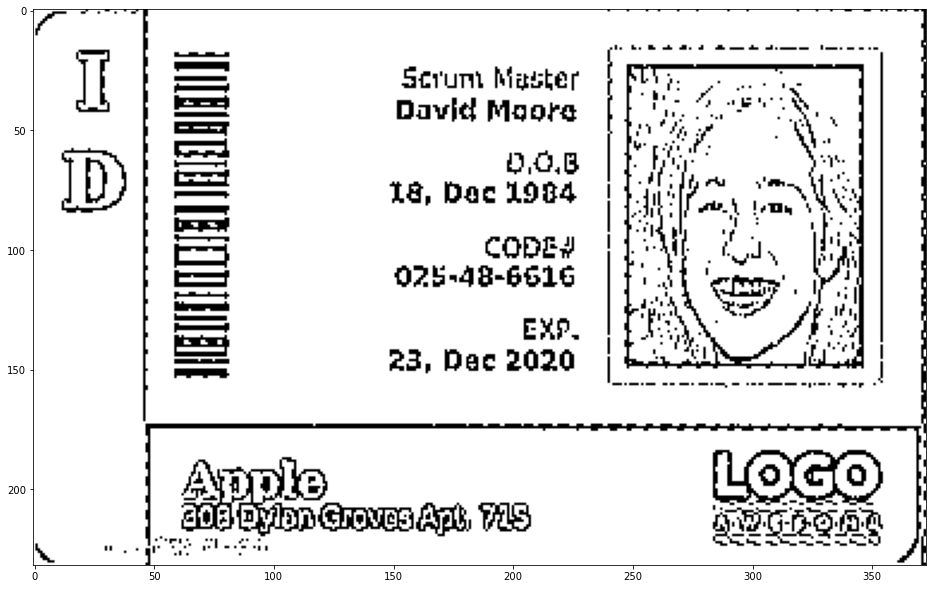

In [25]:
gray_id = cv2.cvtColor(id_card_rgb, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray_id, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 3)
binary_id = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)
plt.imshow(binary_id)